<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

In [4]:
from matplotlib import pyplot as plt

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()

0.9565265700499271

In [2]:
np.random.rand(5,2)

array([[0.1631152 , 0.06575177],
       [0.53280117, 0.11740851],
       [0.76630176, 0.59695914],
       [0.93806675, 0.8876173 ],
       [0.89594701, 0.07446391]])

In [7]:
n = 10000
random_numbers = np.random.rand(n)

In [5]:
np.sum(random_numbers < .5)/n *100

49.69

In [6]:
np.sum(random_numbers < .25/n * 100)

26

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

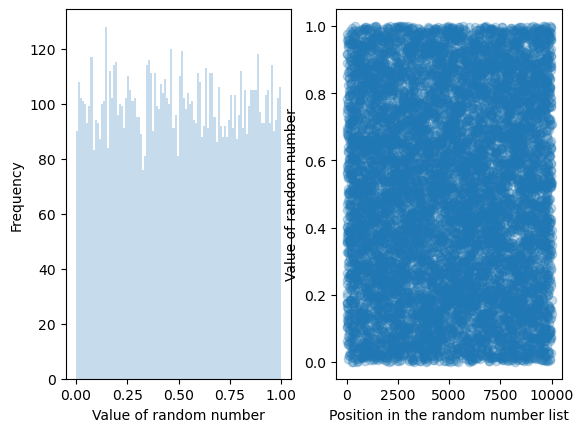

In [6]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

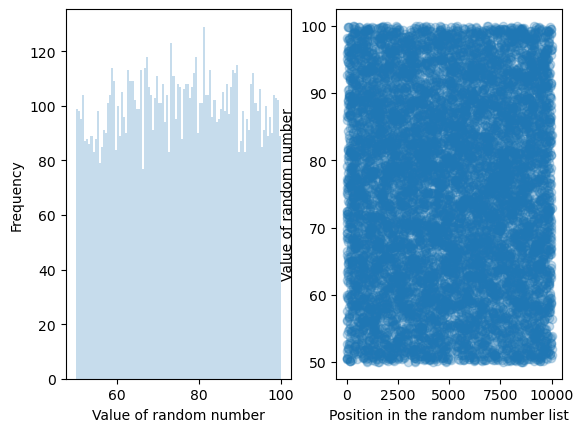

In [9]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)


fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [10]:
np.random.randint(0, 100, 10) 

array([18, 36, 51, 79, 46, 92, 80, 38, 97, 17])

In [11]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [12]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [14]:
questions = ['Will I get A for SP2273?',
             'Will 1150 be fast today?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I get A for SP2273?
A: As I see it, yes.

Q: Will 1150 be fast today?
A: My reply is no.

Q: Will I be in trouble?
A: Signs point to yes.



## 3 Flipping Coins

### 3.1 A fair coin

In [15]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [16]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Tails', 'Head', 'Head', 'Tails', 'Head', 'Tails',
       'Head', 'Head'], dtype='<U5')

In [17]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [24]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 50.00%


### 3.2 A biased coin

In [37]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 71.20%


### 3.3 A flipping experiment

In [44]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

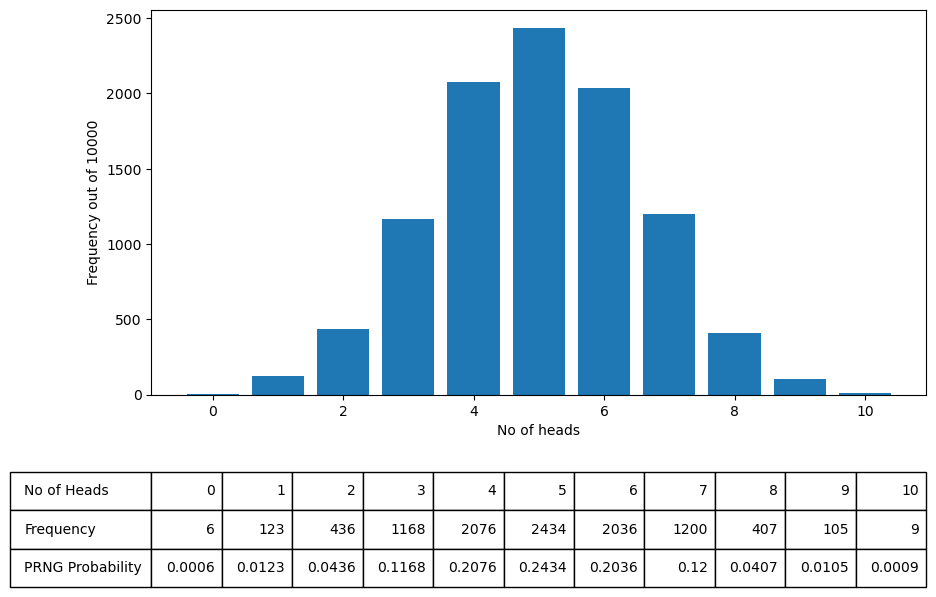

In [45]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [47]:
pip install scipy

     ---------------------------------------- 42.5/42.5 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from scipy.stats import binom

In [53]:
binom.pmf(k=7, n=10, p=.5)

0.11718749999999996

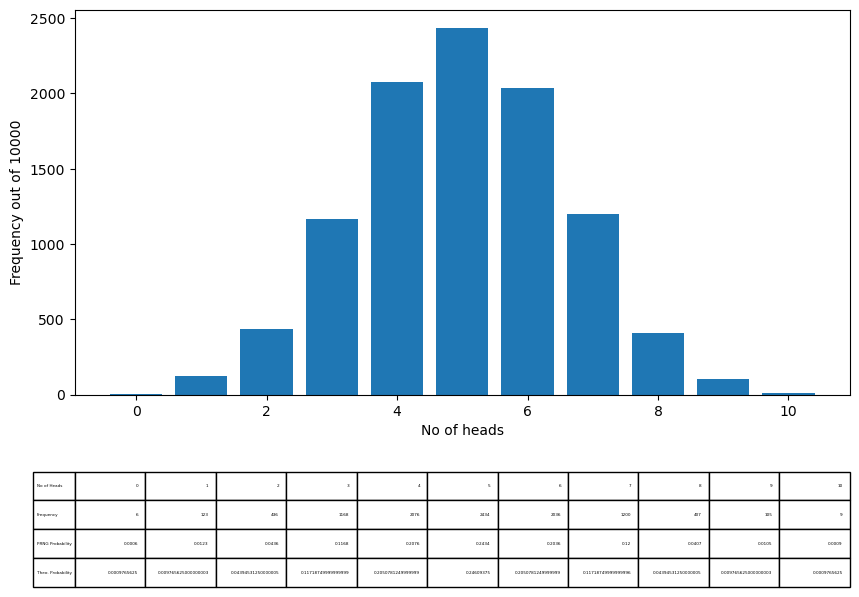

In [52]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])





## Exercise 1 :  12C, 13C

In [1]:
n = 27 
p = .0111 

mean = n * p
print("Mean number of 13C atoms:", mean)


sd = (n * p * (1 - p)) ** .5
print("Standard deviation of 13C atoms:", sd)


Mean number of 13C atoms: 0.2997
Standard deviation of 13C atoms: 0.5444018093283673


In [2]:
prob_zero_13C = (1 - p) ** n
print("Probability of no 13C atoms:", prob_zero_13C)


Probability of no 13C atoms: 0.7397997429318266
